## Monk1 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [5]:
import numpy as np

from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MAE, MSE
from wavegrad.optimizers import *

# network
net = Sequential()
net.add(LayerDense(17, 5, sigmoid))
net.add(LayerDense(5, 1, tanh))
optim = GD(net.layers, lr=0.01, momentum=0.6)
# train
net.use(MSE)
net.fit(Xtrain, ytrain, epochs=500, optimizer=optim)

# test
out = net.predict(Xtrain)

epoch 500/500   error=0.00    accuracy=1.00: 100%|██████████| 500/500 [00:06<00:00, 78.76it/s]


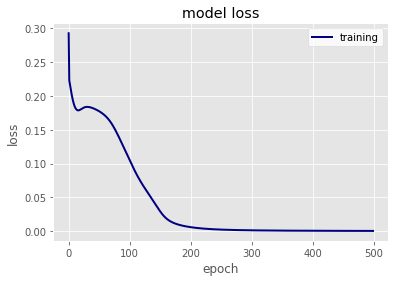

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

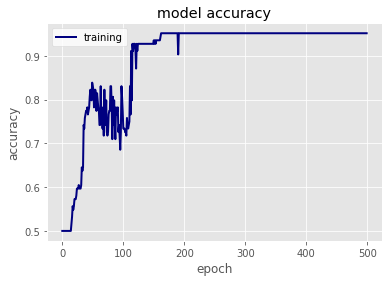

In [7]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('accuracy')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

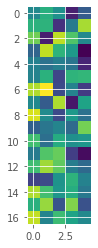

In [5]:
plt.imshow(net.layers[0].weights)

# Tensorflow model to compare with mine

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.Sequential([
    keras.Input(shape=(17,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='tanh')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


The problem here is that Tensorflow don't have the Gradient Descent methos, but only the SGD so i have to implement it to compare the two networks

In [9]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [10]:
history = model.fit(
    Xtrain ,ytrain, epochs=500, batch_size=len(Xtrain)
)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 890us/step - loss: 0.4736 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 758us/step - loss: 0.4375 - accuracy: 0.5081
Epoch 4/500
1/1 [==============================] - 0s 874us/step - loss: 0.3941 - accuracy: 0.5081
Epoch 5/500
1/1 [==============================] - 0s 709us/step - loss: 0.3512 - accuracy: 0.4839
Epoch 6/500
1/1 [==============================] - 0s 762us/step - loss: 0.3148 - accuracy: 0.4597
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.4597
Epoch 8/500
1/1 [==============================] - 0s 898us/step - loss: 0.2719 - accuracy: 0.4435
Epoch 9/500
1/1 [==============================] - 0s 840us/step - loss: 0.2643 - accuracy: 0.4677
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.4758
Epoch 11/500
1/

1/1 [==============================] - 0s 640us/step - loss: 0.2209 - accuracy: 0.5887
Epoch 84/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.5887
Epoch 85/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.5887
Epoch 86/500
1/1 [==============================] - 0s 807us/step - loss: 0.2195 - accuracy: 0.5887
Epoch 87/500
1/1 [==============================] - 0s 740us/step - loss: 0.2190 - accuracy: 0.5887
Epoch 88/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.5887
Epoch 89/500
1/1 [==============================] - 0s 746us/step - loss: 0.2181 - accuracy: 0.5887
Epoch 90/500
1/1 [==============================] - 0s 661us/step - loss: 0.2176 - accuracy: 0.5887
Epoch 91/500
1/1 [==============================] - 0s 681us/step - loss: 0.2172 - accuracy: 0.6048
Epoch 92/500
1/1 [==============================] - 0s 852us/step - loss: 0.2167 - accuracy: 0.6048
Epoch 93/500
1/1 [=

1/1 [==============================] - 0s 894us/step - loss: 0.1906 - accuracy: 0.7339
Epoch 165/500
1/1 [==============================] - 0s 683us/step - loss: 0.1903 - accuracy: 0.7339
Epoch 166/500
1/1 [==============================] - 0s 857us/step - loss: 0.1900 - accuracy: 0.7339
Epoch 167/500
1/1 [==============================] - 0s 937us/step - loss: 0.1898 - accuracy: 0.7419
Epoch 168/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1895 - accuracy: 0.7419
Epoch 169/500
1/1 [==============================] - 0s 642us/step - loss: 0.1892 - accuracy: 0.7419
Epoch 170/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.7419
Epoch 171/500
1/1 [==============================] - 0s 795us/step - loss: 0.1886 - accuracy: 0.7419
Epoch 172/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.7419
Epoch 173/500
1/1 [==============================] - 0s 634us/step - loss: 0.1881 - accuracy: 0.7419
Epoch 174/

1/1 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.7823
Epoch 246/500
1/1 [==============================] - 0s 936us/step - loss: 0.1724 - accuracy: 0.7903
Epoch 247/500
1/1 [==============================] - 0s 913us/step - loss: 0.1722 - accuracy: 0.7903
Epoch 248/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.7903
Epoch 249/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.7903
Epoch 250/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1717 - accuracy: 0.7903
Epoch 251/500
1/1 [==============================] - 0s 616us/step - loss: 0.1716 - accuracy: 0.7903
Epoch 252/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 0.7903
Epoch 253/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.7903
Epoch 254/500
1/1 [==============================] - 0s 684us/step - loss: 0.1711 - accuracy: 0.7903
Epoch 255/500
1/

1/1 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.7903
Epoch 327/500
1/1 [==============================] - 0s 662us/step - loss: 0.1633 - accuracy: 0.7903
Epoch 328/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.7903
Epoch 329/500
1/1 [==============================] - 0s 931us/step - loss: 0.1631 - accuracy: 0.7903
Epoch 330/500
1/1 [==============================] - 0s 695us/step - loss: 0.1630 - accuracy: 0.7903
Epoch 331/500
1/1 [==============================] - 0s 995us/step - loss: 0.1630 - accuracy: 0.7903
Epoch 332/500
1/1 [==============================] - 0s 697us/step - loss: 0.1629 - accuracy: 0.7903
Epoch 333/500
1/1 [==============================] - 0s 762us/step - loss: 0.1628 - accuracy: 0.7903
Epoch 334/500
1/1 [==============================] - 0s 894us/step - loss: 0.1628 - accuracy: 0.7903
Epoch 335/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.7903
Epoch 336/

1/1 [==============================] - 0s 3ms/step - loss: 0.1589 - accuracy: 0.7742
Epoch 408/500
1/1 [==============================] - 0s 678us/step - loss: 0.1588 - accuracy: 0.7742
Epoch 409/500
1/1 [==============================] - 0s 653us/step - loss: 0.1588 - accuracy: 0.7742
Epoch 410/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.7742
Epoch 411/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.7742
Epoch 412/500
1/1 [==============================] - 0s 971us/step - loss: 0.1587 - accuracy: 0.7742
Epoch 413/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.7742
Epoch 414/500
1/1 [==============================] - 0s 919us/step - loss: 0.1586 - accuracy: 0.7742
Epoch 415/500
1/1 [==============================] - 0s 656us/step - loss: 0.1586 - accuracy: 0.7742
Epoch 416/500
1/1 [==============================] - 0s 658us/step - loss: 0.1585 - accuracy: 0.7742
Epoch 417/50

1/1 [==============================] - 0s 749us/step - loss: 0.1564 - accuracy: 0.7823
Epoch 489/500
1/1 [==============================] - 0s 789us/step - loss: 0.1564 - accuracy: 0.7823
Epoch 490/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.7823
Epoch 491/500
1/1 [==============================] - 0s 680us/step - loss: 0.1563 - accuracy: 0.7823
Epoch 492/500
1/1 [==============================] - 0s 916us/step - loss: 0.1563 - accuracy: 0.7823
Epoch 493/500
1/1 [==============================] - 0s 707us/step - loss: 0.1563 - accuracy: 0.7823
Epoch 494/500
1/1 [==============================] - 0s 763us/step - loss: 0.1562 - accuracy: 0.7823
Epoch 495/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.7823
Epoch 496/500
1/1 [==============================] - 0s 672us/step - loss: 0.1562 - accuracy: 0.7823
Epoch 497/500
1/1 [==============================] - 0s 832us/step - loss: 0.1562 - accuracy: 0.7823
Epoch 49

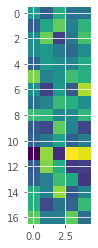

In [11]:
plt.imshow(model.layers[0].get_weights()[0])

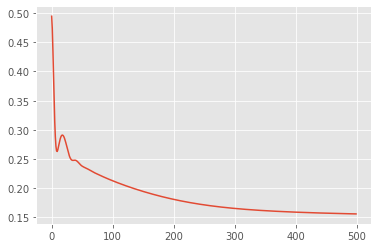

In [12]:
plt.plot(history.history['loss'])

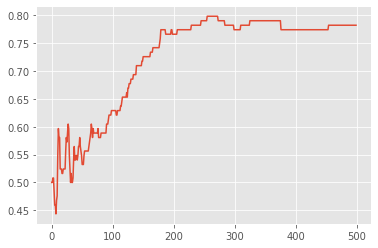

In [13]:
plt.plot(history.history['accuracy'])